In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import helpers

%matplotlib inline 

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,7)


In [11]:
arr_simple = np.load("data/AA66266AA.npy",allow_pickle=True)
arr_double = np.load("data/AA662266AA.npy",allow_pickle=True)

In [12]:
print("Simple polymer shape ", arr_simple.shape, arr_simple[0].shape)
print("Double polymer shape ", arr_double.shape, arr_double[0].shape)

Simple polymer shape  (22039,) (425, 2)
Double polymer shape  (50957,) (419, 2)


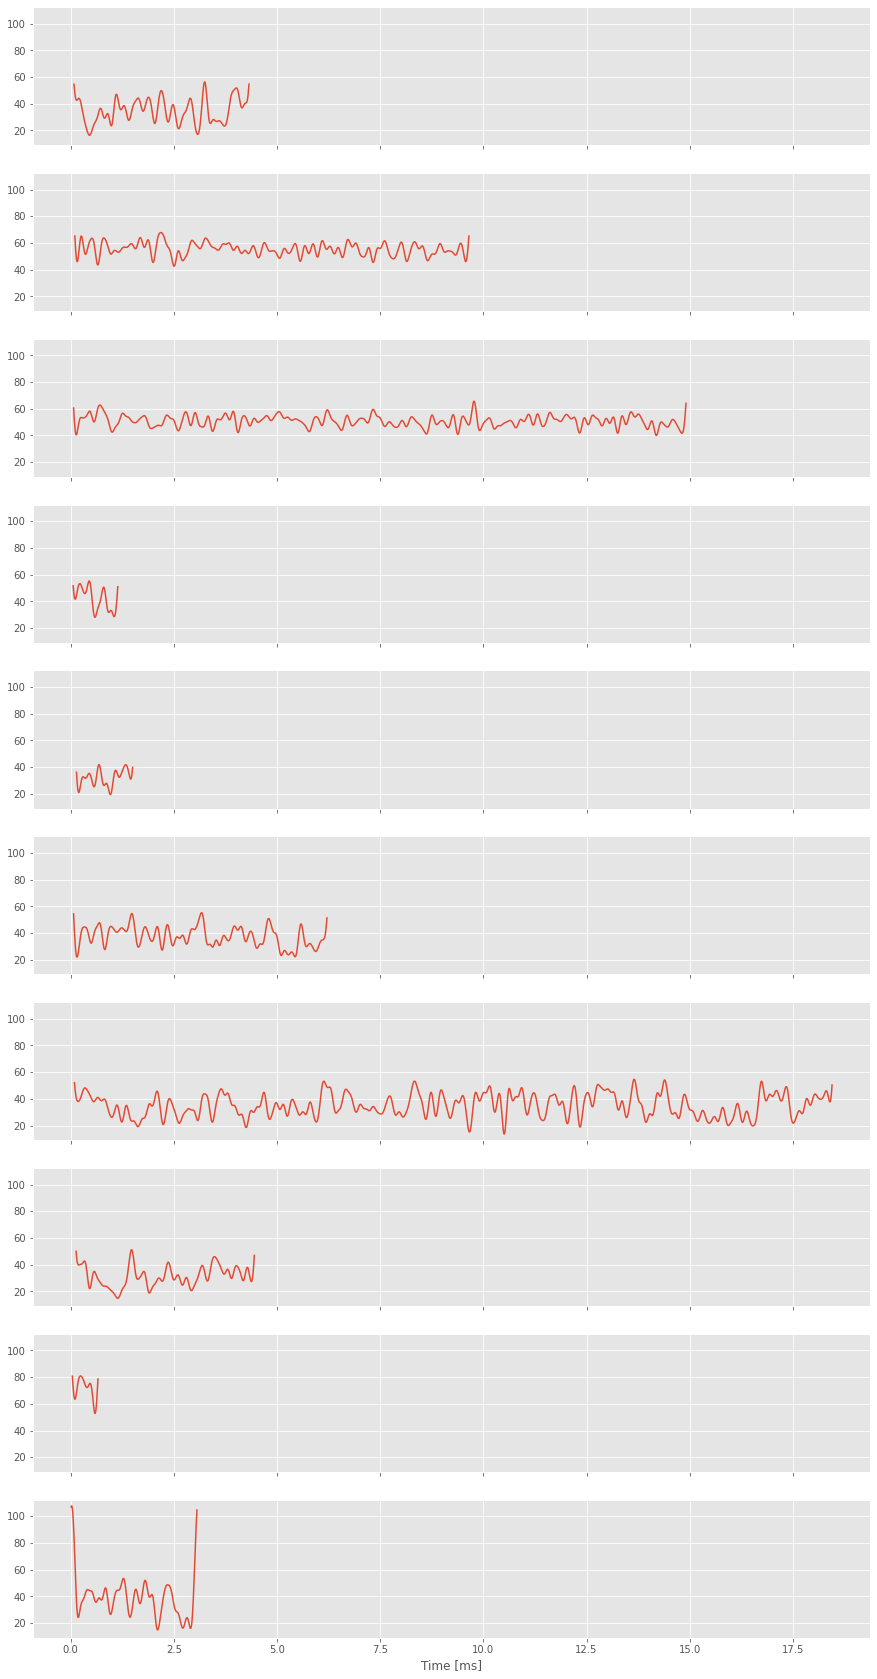

In [13]:
k = 10
fig, axes = plt.subplots(k,1, figsize=(15,30), sharex=True, sharey=True)

for i in range(k):
    obs = arr_simple[i]
    time = obs[:,0]
    current = obs[:,1]

    g= sns.lineplot(x=time,y=current, ax=axes[i])
    g.set_xlabel("Time [ms]")

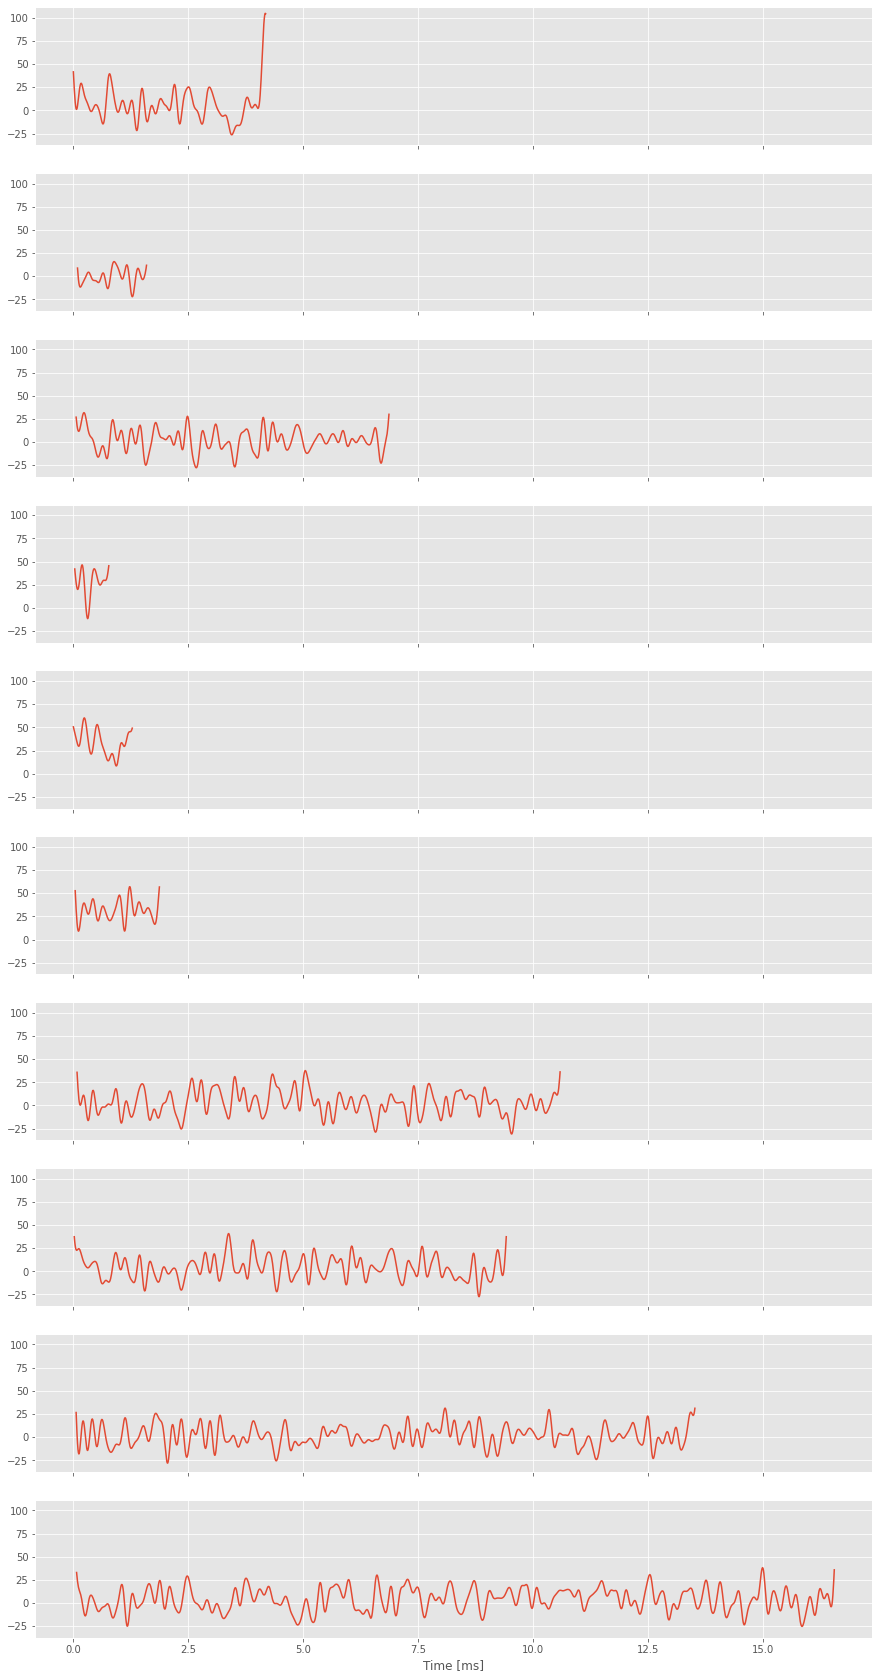

In [14]:
k = 10
fig, axes = plt.subplots(k,1, figsize=(15,30), sharex=True, sharey=True)

for i in range(k):
    obs = arr_double[i]
    time = obs[:,0]
    current = obs[:,1]

    g= sns.lineplot(x=time,y=current, ax=axes[i])
    g.set_xlabel("Time [ms]")

In [15]:
arr_simple[0][-1,0]

4.32

In [16]:
def count_extremums(current):
    increasing = current[0]<current[1]
    tmp=current[0]
    counter = 0
    values=[]
    for i in current[1:]:
        if increasing and i<tmp:
            increasing = False
            counter +=1
            values.append(i)
        elif not increasing and i>tmp:
            increasing=True
            counter+=1
            values.append(i)

        tmp=i
    return counter

In [17]:
def extract_features(row):
    length=row[-1,0]
    current=row[:,1]
    mean_current=np.mean(current)
    max_current=np.max(current)
    min_current=np.min(current)
    extremum_count=count_extremums(current)
    return (length, mean_current, max_current, min_current, extremum_count)
    


In [18]:
length, mean_current, max_current, min_current, extremum_count=extract_features(arr_simple[0])

In [19]:
def get_extracted_features(arr, plot=False):
    lengths=[]
    means=[]
    maxs=[]
    mins=[]
    extremum_counts=[]
    
    for row in arr:
        length, mean_current, max_current, min_current, extremum_count=extract_features(row)
        lengths.append(length)
        means.append(mean_current)
        maxs.append(max_current)
        mins.append(min_current)
        extremum_counts.append(extremum_count)
    if plot:
        fig, axes = plt.subplots(5,1, figsize=(15,30))
        sns.histplot(lengths, ax=axes[0]).set_title("lengths")
        sns.histplot(means, ax=axes[1]).set_title("means")
        sns.histplot(maxs, ax=axes[2]).set_title("maxs")
        sns.histplot(mins, ax=axes[3]).set_title("mins")
        sns.histplot(extremum_counts, ax=axes[4]).set_title("extremum counts")
    return np.array([np.array(lengths),np.array(means),np.array(maxs),np.array(mins),np.array(extremum_counts)])


In [20]:
simpleX=get_extracted_features(arr_simple).T

In [21]:
doubleX=get_extracted_features(arr_double).T

In [22]:
doubleX.shape

(50957, 5)

In [23]:
X=np.concatenate((simpleX, doubleX))
Y=np.concatenate((np.zeros(len(simpleX)),np.ones(len(doubleX))))

In [24]:
X.shape
Y.shape

(72996,)

In [25]:
from sklearn import svm, model_selection

In [26]:
X_train, X_test, y_train, y_test=model_selection.train_test_split(X,Y, train_size=0.7, random_state=3)

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [27]:
clf.score(X_test,y_test)

0.8338736928626878

In [28]:
import torch as pytorch 

In [38]:
X_chunks=[]
Y_chunks=[]
for label, row in zip(Y,X):
    y,x= helpers.split_in_k(la
    bel,row,6)
    Y_chunks.append(list(y))
    X_chunks.append(list(x))


IndexError: invalid index to scalar variable.

In [ ]:
pytorch.nn.LSTM()